<a href="https://colab.research.google.com/github/EmmanueleVilla/quantum_computing/blob/main/Dungeon_Third_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pylatexenc==2.10 && pip install qiskit==1.0.2 && pip install qiskit-aer-gpu && pip install qiskit-ibm-provider

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=ceec478588a8722166d8eb970ec8eed161bf13d67d595263d0f2d314b24cb5be
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.8/18.8 MB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [2]:
!pip install ipython-autotime
%load_ext autotime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.5 MB/s eta 0:00:00
time: 438 µs (started: 2024-04-12 07:13:55 +00:00)


In [3]:
import math
import networkx as nx
import numpy as np
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.quantum_info import Statevector
from qiskit.visualization import circuit_drawer, plot_histogram
import matplotlib.pyplot as plt
from qiskit.circuit.library.standard_gates.multi_control_rotation_gates import MCXGate
from qiskit.circuit.library import QFT
from qiskit.circuit.library import MCMT, YGate, RYGate
import itertools
from qiskit_ibm_provider import IBMProvider

time: 2.19 s (started: 2024-04-12 07:13:55 +00:00)


## State preparation from cell 0

In [4]:
# Creates a 3x3 grid
G = nx.grid_2d_graph(3, 3)
mapping = {(i, j): i * 3 + j for i in range(3) for j in range(3)}
G = nx.relabel_nodes(G, mapping)

edges = list(G.edges())
undirected_edges = edges + [(v, u) for u, v in edges]

print(undirected_edges)

[(0, 3), (0, 1), (1, 4), (1, 2), (2, 5), (3, 6), (3, 4), (4, 7), (4, 5), (5, 8), (6, 7), (7, 8), (3, 0), (1, 0), (4, 1), (2, 1), (5, 2), (6, 3), (4, 3), (7, 4), (5, 4), (8, 5), (7, 6), (8, 7)]
time: 5.91 ms (started: 2024-04-12 07:13:57 +00:00)


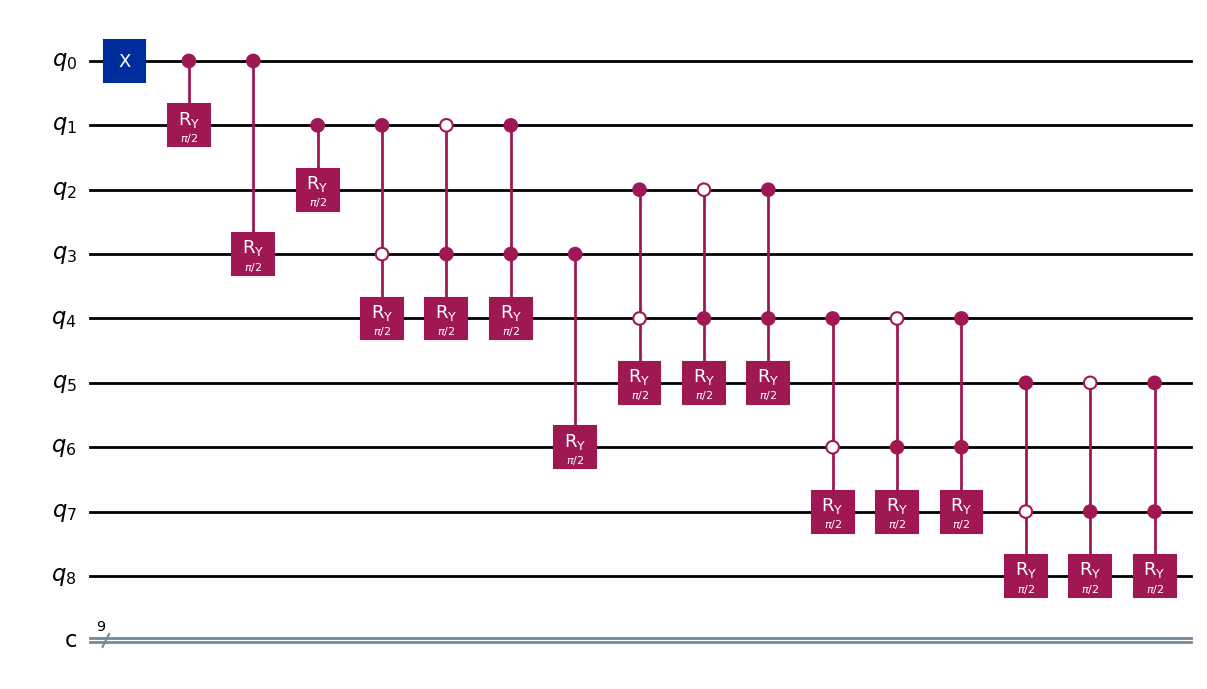

time: 858 ms (started: 2024-04-11 16:42:29 +00:00)


In [5]:
qc = QuantumCircuit(9, 9)
qc.x(0)

visited = [0]

while True:
  frontier = list(set([edge[1] for edge in undirected_edges if edge[0] in visited and edge[1] not in visited]))

  if len(frontier) == 0:
    break

  for node in frontier:
    incoming = [edge[1] for edge in undirected_edges if edge[0] == node and edge[1] in visited]

    if len(incoming) == 1:
      qc.cry(np.pi/2, incoming[0], node)

    if len(incoming) > 1:
      combinations = [''.join([str(a) for a in x]) for x in list(itertools.product([0, 1], repeat=2))][1:]

      for combination in combinations:
        gate = RYGate(np.pi/2).control(2, ctrl_state=combination)
        qc.append(gate, [incoming[0], incoming[1], node])

  visited.extend(frontier)


qc.draw("mpl")

In [6]:
qc.measure(range(9), range(9))

time: 3.05 ms (started: 2024-04-11 16:42:30 +00:00)


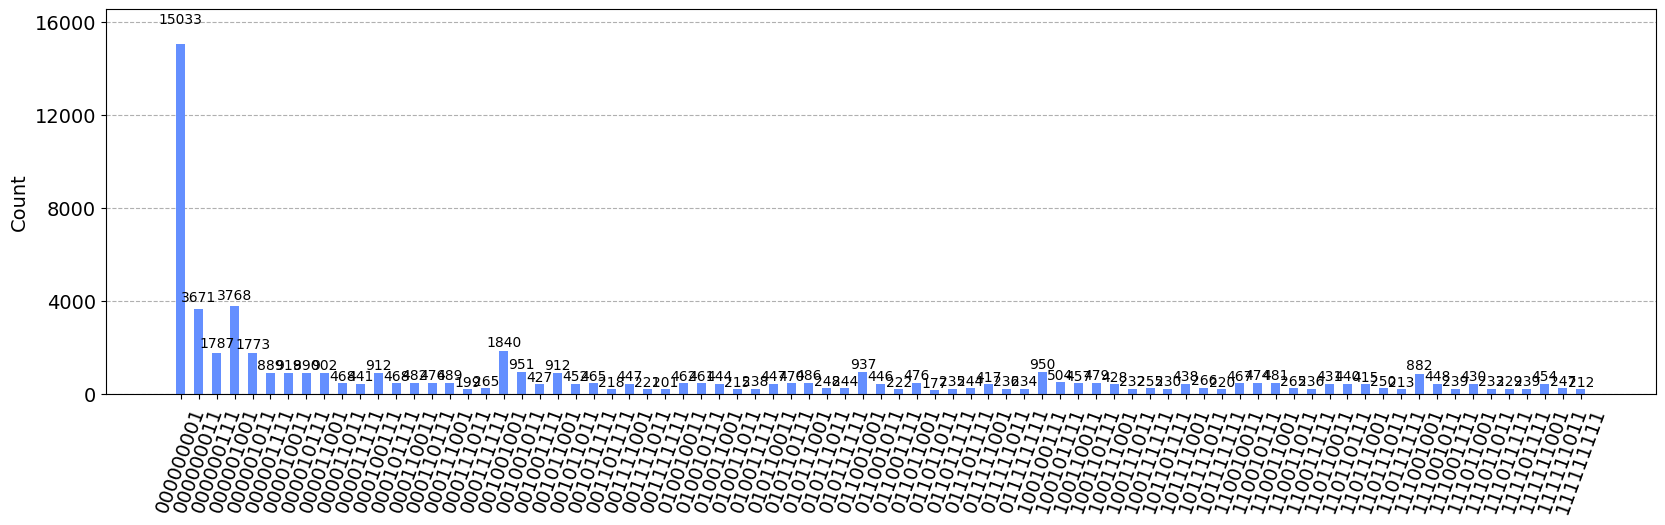

In [7]:
qasm_sim = Aer.get_backend('qasm_simulator')
transpiled = transpile(qc, qasm_sim)
job = qasm_sim.run(transpiled, shots=9**5)
result = job.result()
counts = result.get_counts()
plot_histogram(counts, figsize=(20,5))

In [8]:
values = [val for val in counts.values()]
np.std(values)

1728.9175862918025

## Genetic algorithm

In [5]:
!pip install pygad

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.5 MB/s eta 0:00:00
time: 12.3 s (started: 2024-04-12 07:13:57 +00:00)


In [6]:
import pygad

time: 37.6 ms (started: 2024-04-12 07:14:09 +00:00)


In [7]:
"""
Debug function
"""
def on_gen(ga_instance):
    print("Generation : ", ga_instance.generations_completed)
    print("Fitness of the best solution :", ga_instance.best_solution()[1])
    solution, solution_fitness, solution_idx = ga_instance.best_solution()
    print(solution)

time: 799 µs (started: 2024-04-12 07:14:09 +00:00)


In [10]:
"""
Circuit creation
"""
def create_circuit(solution, start):
  gate_index = 0

  qc = QuantumCircuit(9, 9)
  qc.x(start)

  visited = [start]

  while True:
    frontier = list(set([edge[1] for edge in undirected_edges if edge[0] in visited and edge[1] not in visited]))

    if len(frontier) == 0:
      break

    for node in frontier:
      incoming = [edge[1] for edge in undirected_edges if edge[0] == node and edge[1] in visited]

      if len(incoming) == 1:
        qc.cry(solution[gate_index], incoming[0], node)
        gate_index = gate_index + 1

      if len(incoming) > 1:
        combinations = [''.join([str(a) for a in x]) for x in list(itertools.product([0, 1], repeat=2))][1:]

        for combination in combinations:
          gate = RYGate(solution[gate_index]).control(2, ctrl_state=combination)
          qc.append(gate, [incoming[0], incoming[1], node])
          gate_index = gate_index + 1

    visited.extend(frontier)

  return qc

"""
Evaluate circuit
"""
def evaluate(qc):
  qc.measure(range(9), range(9))
  qasm_sim = Aer.get_backend('qasm_simulator')
  transpiled = transpile(qc, qasm_sim)
  job = qasm_sim.run(transpiled, shots=9**5)
  result = job.result()
  counts = result.get_counts()
  return counts

"""
Fitness Function
"""
def fitness_func(ga_instance, solution, solution_idx):
  qc = create_circuit(solution, 0)
  counts = evaluate(qc)
  values = [val for val in counts.values()]

  fitness_high_priority = len(values)

  return fitness_high_priority + 1 / np.std(values)

time: 2.6 ms (started: 2024-04-11 16:42:32 +00:00)


In [ ]:
num_variables = 16

variable_range = np.linspace(0, np.pi, dtype='float')

ga_instance = pygad.GA(num_generations=50,
                       num_parents_mating=4,
                       sol_per_pop=100,
                       num_genes=num_variables,
                       gene_type=np.float64,
                       gene_space=variable_range,
                       on_generation=on_gen,
                       fitness_func=fitness_func)

ga_instance.run()

In [ ]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
solution

In [11]:
# Already calculated solution
solution = [2.30810889, 2.17988062, 1.66696753, 2.17988062, 2.17988062,
       1.98753821, 1.73108167, 1.7951958 , 1.7951958 , 1.73108167,
       1.66696753, 1.98753821, 1.66696753, 1.60285339, 1.53873926,
       1.60285339]

time: 625 µs (started: 2024-04-11 16:42:32 +00:00)


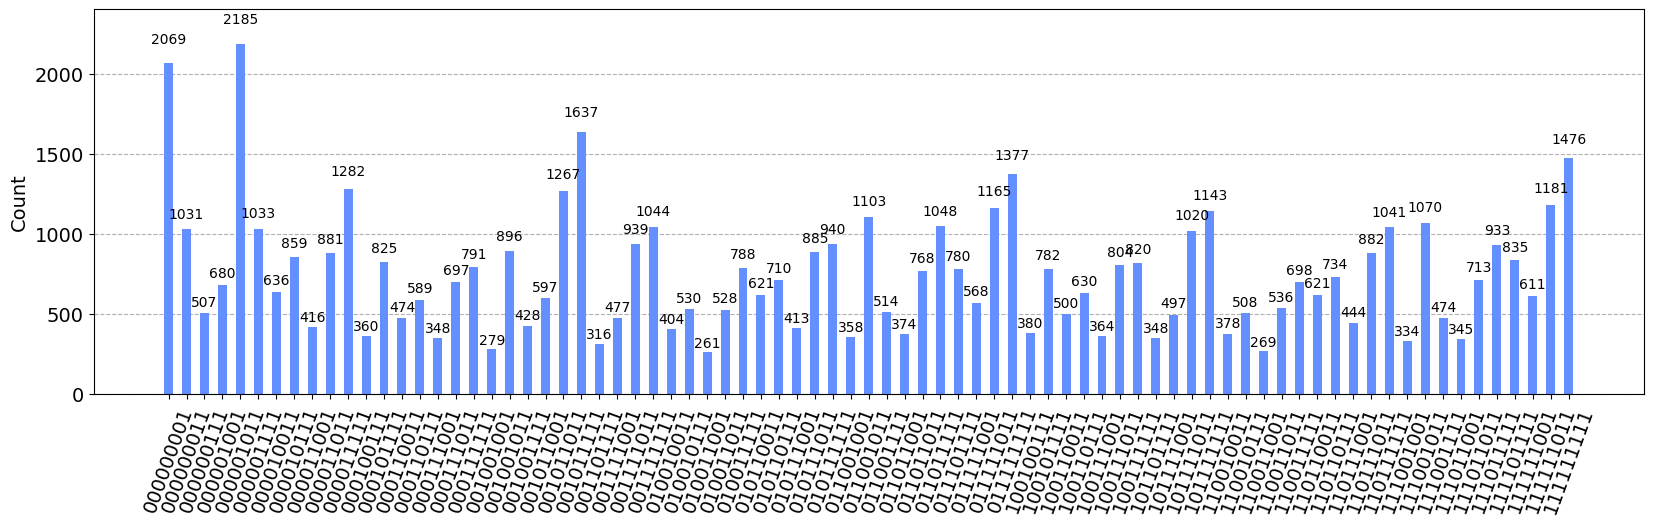

time: 1.32 s (started: 2024-04-11 16:42:32 +00:00)


In [12]:
qc = create_circuit(solution, 0)
counts = evaluate(qc)
plot_histogram(counts, figsize=(20,5))

In [13]:
values = [val for val in counts.values()]
np.std(values)

378.2914888929159

time: 5.81 ms (started: 2024-04-11 16:42:33 +00:00)


## W-state example

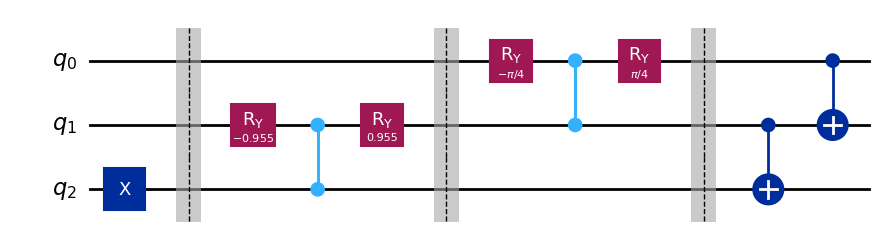

time: 350 ms (started: 2024-04-11 16:42:33 +00:00)


In [14]:
q = QuantumRegister(3, "q")

qc = QuantumCircuit(q)

# Initialization to |100>
qc.x(q[2])
qc.barrier()

# First F -> |100> + |110>
theta = np.arccos(np.sqrt(1/(3 - 1 + 1)))
qc.ry(-theta, q[1])
qc.cz(q[2], q[1])
qc.ry(theta, q[1])
qc.barrier()

# Second F -> |100> + |110> + |111>
theta = np.arccos(np.sqrt(1/(3 - 2 + 1)))
qc.ry(-theta, q[0])
qc.cz(q[1], q[0])
qc.ry(theta, q[0])
qc.barrier()

# CNOTs -> |100> + |010> + |001>
qc.cx(q[1], q[2])
qc.cx(q[0], q[1])

qc.draw("mpl")

## Execution

In [9]:
def create_circuit_no_meas(solution, start):
  gate_index = 0

  qc = QuantumCircuit(9)
  qc.x(start)

  visited = [start]

  while True:
    frontier = list(set([edge[1] for edge in undirected_edges if edge[0] in visited and edge[1] not in visited]))

    if len(frontier) == 0:
      break

    for node in frontier:
      incoming = [edge[1] for edge in undirected_edges if edge[0] == node and edge[1] in visited]

      if len(incoming) == 1:
        qc.cry(solution[gate_index], incoming[0], node)
        gate_index = gate_index + 1

      if len(incoming) > 1:
        combinations = [''.join([str(a) for a in x]) for x in list(itertools.product([0, 1], repeat=2))][1:]

        for combination in combinations:
          gate = RYGate(solution[gate_index]).control(2, ctrl_state=combination)
          qc.append(gate, [incoming[0], incoming[1], node])
          gate_index = gate_index + 1

    visited.extend(frontier)

  return qc

time: 4.79 ms (started: 2024-04-12 07:14:10 +00:00)


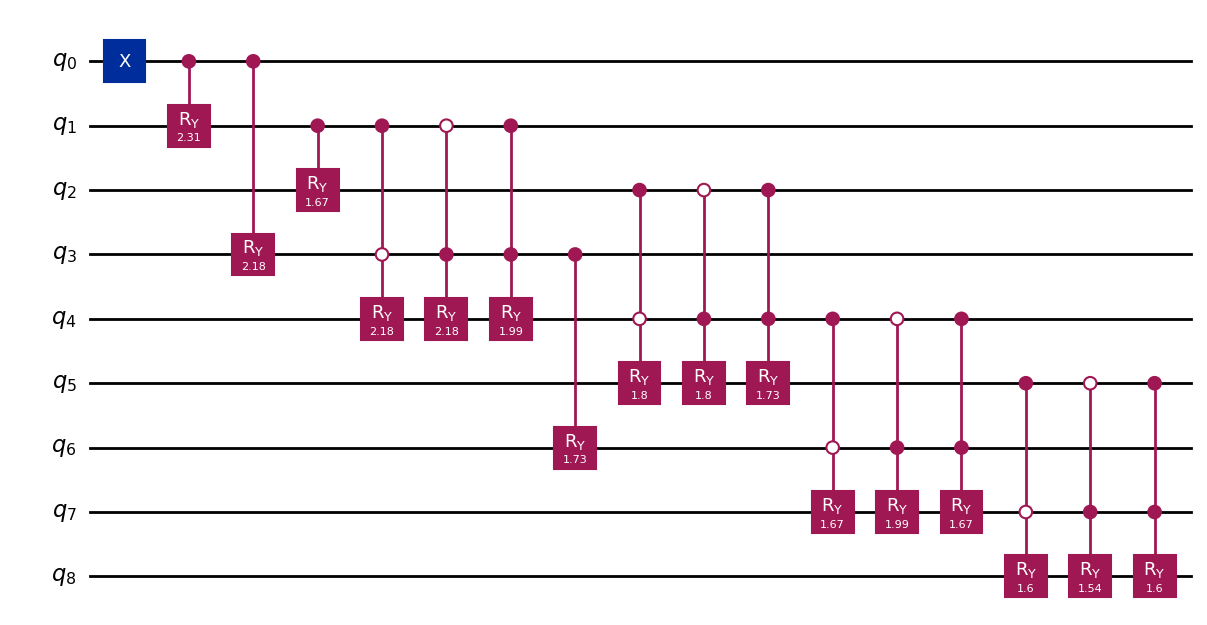

time: 1.25 s (started: 2024-04-11 16:42:34 +00:00)


In [16]:
# Creating the state_prep and inverse to be used in Grover
solution = [2.30810889, 2.17988062, 1.66696753, 2.17988062, 2.17988062,
       1.98753821, 1.73108167, 1.7951958 , 1.7951958 , 1.73108167,
       1.66696753, 1.98753821, 1.66696753, 1.60285339, 1.53873926,
       1.60285339]
qc = create_circuit_no_meas(solution, 0)
stat_prep = qc.to_instruction()
inv_stat_prep = qc.inverse().to_instruction()

qc.draw("mpl")

In [17]:
def cnz(qc, num_control, node, anc):
  qc.ccx(node[0], node[1], anc[0])
  for i in range(num_control - 2):
      qc.ccx(node[i + 2], anc[i], anc[i + 1])
  qc.cz(anc[num_control - 2], node[num_control])
  for i in range(num_control - 2)[::-1]:
      qc.ccx(node[i + 2], anc[i], anc[i + 1])
  qc.ccx(node[0], node[1], anc[0])

time: 1.19 ms (started: 2024-04-11 16:42:35 +00:00)


In [18]:
# Registers
graph = QuantumRegister(9, 'graph')
oracle = QuantumRegister(1, 'oracle')
anc = QuantumRegister(7, 'anc_diff')
c = ClassicalRegister(9, 'c')

qc = QuantumCircuit(graph, oracle, anc, c)

qc.barrier(label="State preparation")
qc.append(stat_prep, graph)

qc.barrier(label="Oracle preparation")
qc.x(oracle)
qc.h(oracle)

num_iterations = 1

for i in range(num_iterations):

  qc.barrier(label="Oracle")
  qc.ccx(graph[0], graph[1], anc[0])
  qc.barrier()

  # Now I want to count how many rooms there are in the 3 count qubits
  qc.h([anc[2], anc[3], anc[4]])
  qc.barrier()
  for qubit in graph:
    qc.crz(np.pi/4, qubit, anc[2])
    qc.crz(np.pi/2, qubit, anc[3])
    qc.crz(np.pi, qubit, anc[4])
    qc.barrier()

  qft = QFT(3, do_swaps=True, inverse=True)
  qc.append(qft.to_instruction(), [anc[2], anc[3], anc[4]])

  # And check if the rooms are 4 = '100'
  mcx = MCXGate(3, "count", "100")

  qc.append(mcx, qargs=[anc[2], anc[3], anc[4], anc[1]])

  qc.barrier()

  # I now attach the constraint ancillas to the oracle register
  qc.ccx(anc[0], anc[1], oracle[0])

  qc.barrier()

  qc.append(mcx, qargs=[anc[2], anc[3], anc[4], anc[1]])

  qc.append(qft.inverse().to_instruction(), [anc[2], anc[3], anc[4]])

  # Then I reset the oracle
  for qubit in graph:
    qc.crz(-np.pi, qubit, anc[4])
    qc.crz(-np.pi/2, qubit, anc[3])
    qc.crz(-np.pi/4, qubit, anc[2])
    qc.barrier()

  qc.h([anc[2], anc[3], anc[4]])
  qc.barrier()

  qc.ccx(graph[0], graph[1], anc[0])

  qc.barrier(label="Diffusion")

  # inv state preparation + x
  qc.append(inv_stat_prep, graph)
  qc.x(range(9))

  qc.barrier()

  # Multi-controlled Z
  cnz(qc, 8, graph[::-1], anc)

  qc.barrier()

  # x + state preparation
  qc.x(range(9))
  qc.append(stat_prep, graph)

# Measurement
qc.measure(graph, c)

#qc.draw("mpl")

time: 22.7 ms (started: 2024-04-11 16:42:35 +00:00)


In [19]:
# Transpiling the circuit for the target simulator
quantum_simulator = Aer.get_backend('qasm_simulator')
transpiled = transpile(qc, quantum_simulator)

job = quantum_simulator.run(transpiled, shots=9**4)
result = job.result()
counts = result.get_counts()

time: 1.23 s (started: 2024-04-11 16:42:35 +00:00)


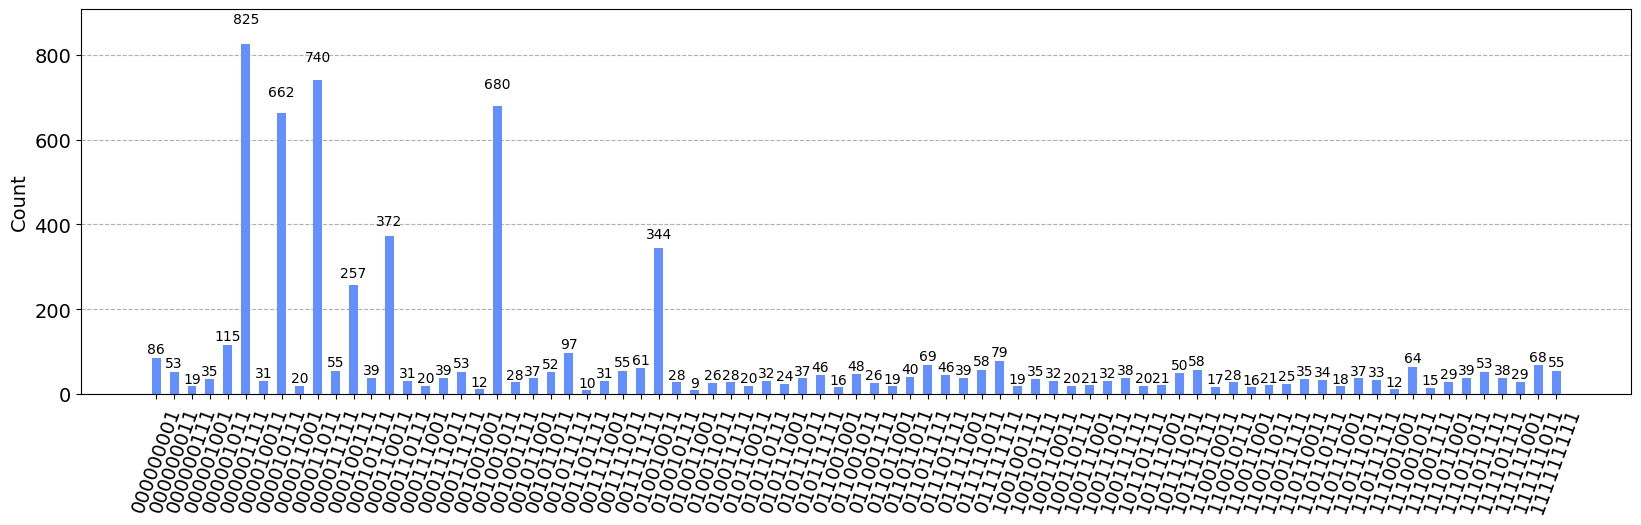

time: 2.18 s (started: 2024-04-11 16:42:36 +00:00)


In [20]:
plot_histogram(counts, figsize=(20, 5))

## GA Starting from vertex 1

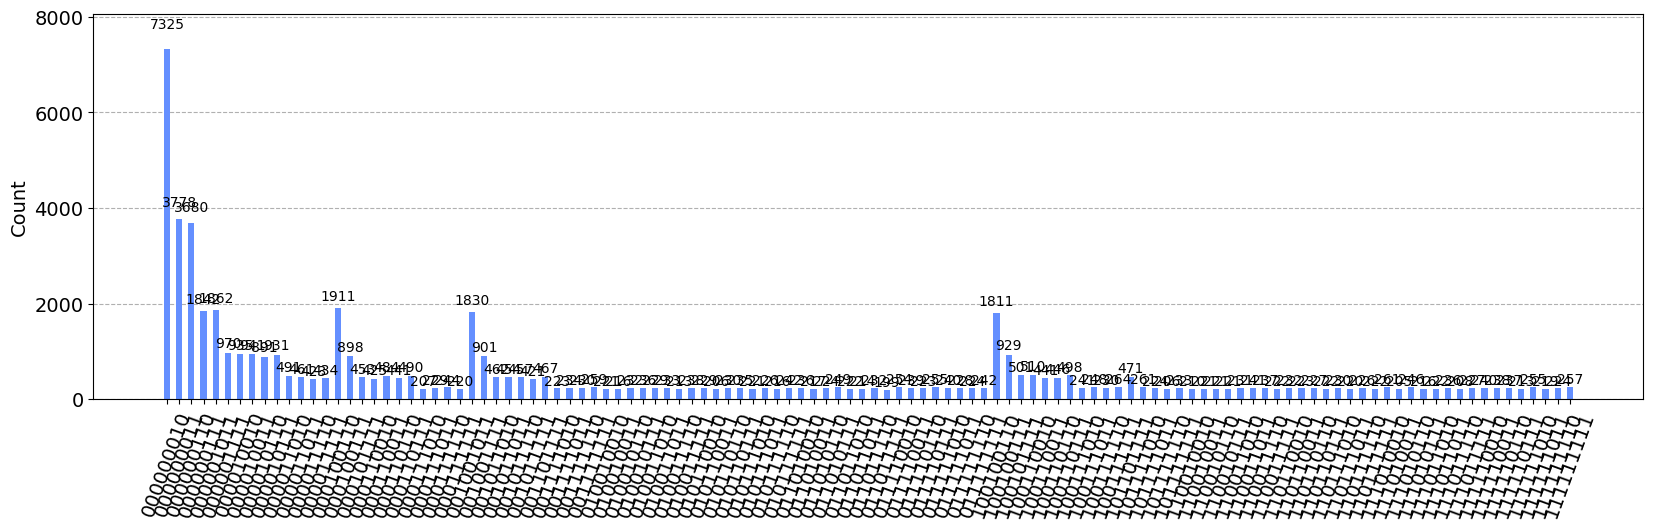

time: 2.72 s (started: 2024-04-12 07:56:37 +00:00)


In [23]:
solution = np.full(
  shape=16,
  fill_value=np.pi/2,
  dtype=np.float64
)
qc = create_circuit(solution, 1)
counts = evaluate(qc)
plot_histogram(counts, figsize=(20,5))

In [24]:
values = [val for val in counts.values()]
np.std(values)

850.5075096694688

time: 11.7 ms (started: 2024-04-12 07:56:42 +00:00)


In [11]:
"""
Circuit creation
"""
def create_circuit(solution, start):
  gate_index = 0

  qc = QuantumCircuit(9, 9)
  qc.x(start)

  visited = [start]

  while True:
    frontier = list(set([edge[1] for edge in undirected_edges if edge[0] in visited and edge[1] not in visited]))

    if len(frontier) == 0:
      break

    for node in frontier:
      incoming = [edge[1] for edge in undirected_edges if edge[0] == node and edge[1] in visited]

      if len(incoming) == 1:
        qc.cry(solution[gate_index], incoming[0], node)
        gate_index = gate_index + 1

      if len(incoming) > 1:
        combinations = [''.join([str(a) for a in x]) for x in list(itertools.product([0, 1], repeat=2))][1:]

        for combination in combinations:
          gate = RYGate(solution[gate_index]).control(2, ctrl_state=combination)
          qc.append(gate, [incoming[0], incoming[1], node])
          gate_index = gate_index + 1

    visited.extend(frontier)

  return qc

"""
Evaluate circuit
"""
def evaluate(qc):
  qc.measure(range(9), range(9))
  qasm_sim = Aer.get_backend('qasm_simulator')
  transpiled = transpile(qc, qasm_sim)
  job = qasm_sim.run(transpiled, shots=9**5)
  result = job.result()
  counts = result.get_counts()
  return counts

"""
Fitness Function
"""
def fitness_func(ga_instance, solution, solution_idx):
  qc = create_circuit(solution, 1)
  counts = evaluate(qc)
  values = [val for val in counts.values()]

  fitness_high_priority = len(values)

  return fitness_high_priority + 1 / np.std(values)

time: 14.2 ms (started: 2024-04-12 07:15:34 +00:00)


In [12]:
num_variables = 16

variable_range = np.linspace(0, np.pi, dtype='float')

ga_instance = pygad.GA(num_generations=50,
                       num_parents_mating=4,
                       sol_per_pop=100,
                       num_genes=num_variables,
                       gene_type=np.float64,
                       gene_space=variable_range,
                       on_generation=on_gen,
                       fitness_func=fitness_func)

ga_instance.run()

/usr/local/lib/python3.10/dist-packages/pygad/pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


Generation :  1
Fitness of the best solution : 116.00101785577502
[1.7951958  1.92342407 1.53873926 1.21816858 1.73108167 2.11576648
 1.34639685 1.15405444 0.8975979  1.47462512 1.47462512 0.25645654
 1.53873926 2.05165235 0.76936963 1.92342407]
Generation :  2
Fitness of the best solution : 116.00139753395862
[1.7951958  1.92342407 2.88513611 1.21816858 2.37222302 2.11576648
 2.05165235 1.47462512 1.66696753 1.34639685 2.75690784 0.96171204
 1.53873926 1.21816858 1.85930994 1.98753821]
Generation :  3
Fitness of the best solution : 116.00166426047338
[1.7951958  1.92342407 2.88513611 1.21816858 2.37222302 2.11576648
 2.24399475 1.15405444 1.66696753 1.34639685 1.47462512 0.96171204
 1.53873926 1.21816858 1.85930994 1.98753821]
Generation :  4
Fitness of the best solution : 116.00194302236397
[1.7951958  1.53873926 2.17988062 1.21816858 2.75690784 2.11576648
 1.28228272 1.47462512 1.66696753 1.98753821 2.75690784 0.96171204
 1.53873926 1.21816858 1.85930994 1.98753821]
Generation :  5


KeyboardInterrupt: 

time: 36min 19s (started: 2024-04-12 07:15:41 +00:00)


In [ ]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
solution

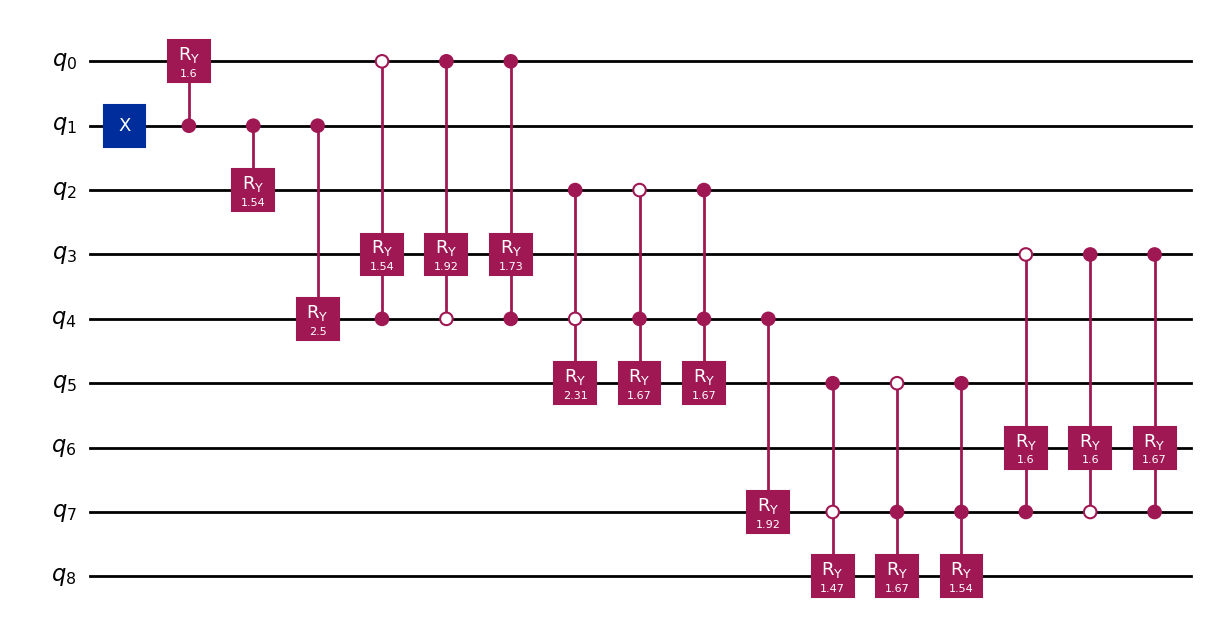

time: 2.31 s (started: 2024-04-12 07:52:39 +00:00)


In [15]:
solution = [1.60285339, 1.53873926, 2.5004513,  1.53873926, 1.92342407, 1.73108167,
 2.30810889, 1.66696753, 1.66696753, 1.92342407, 1.47462512, 1.66696753,
 1.53873926, 1.60285339, 1.60285339, 1.66696753]
qc = create_circuit_no_meas(solution, 1)
qc.draw("mpl")

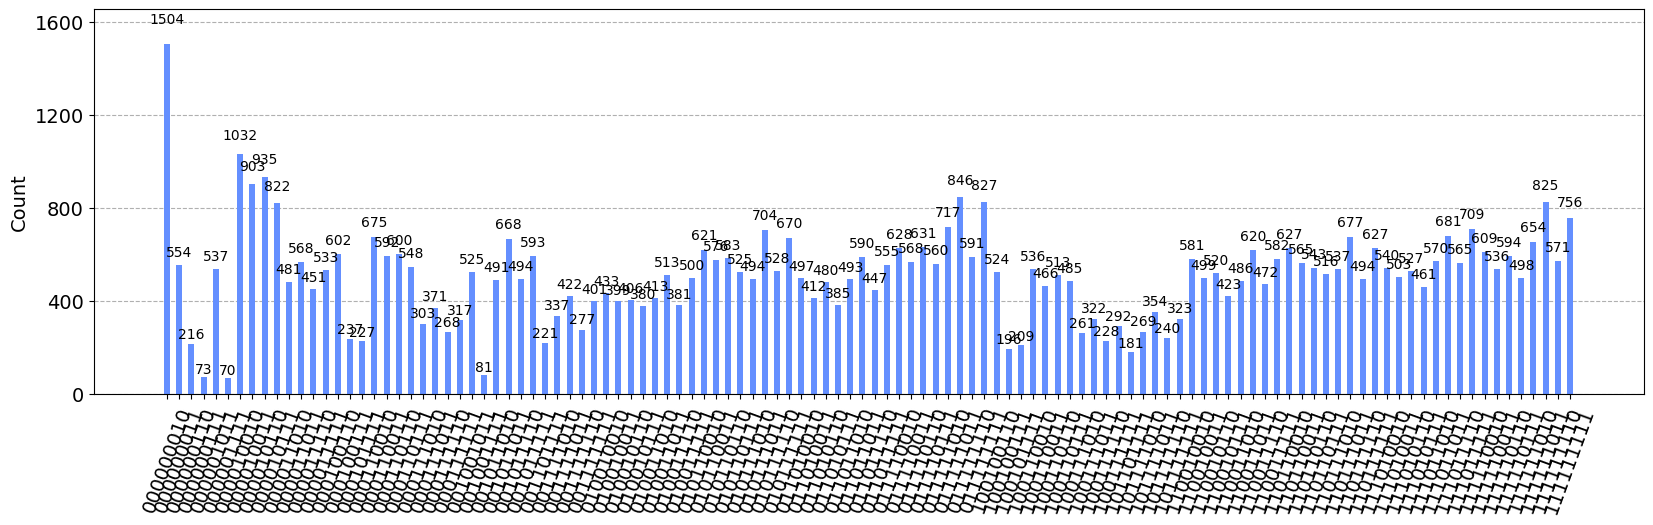

time: 2.81 s (started: 2024-04-12 07:53:39 +00:00)


In [17]:
qc = create_circuit(solution, 1)
counts = evaluate(qc)
plot_histogram(counts, figsize=(20,5))

In [18]:
values = [val for val in counts.values()]
np.std(values)

197.54590877344748

time: 3.54 ms (started: 2024-04-12 07:54:10 +00:00)


## GA Starting from vertex 4

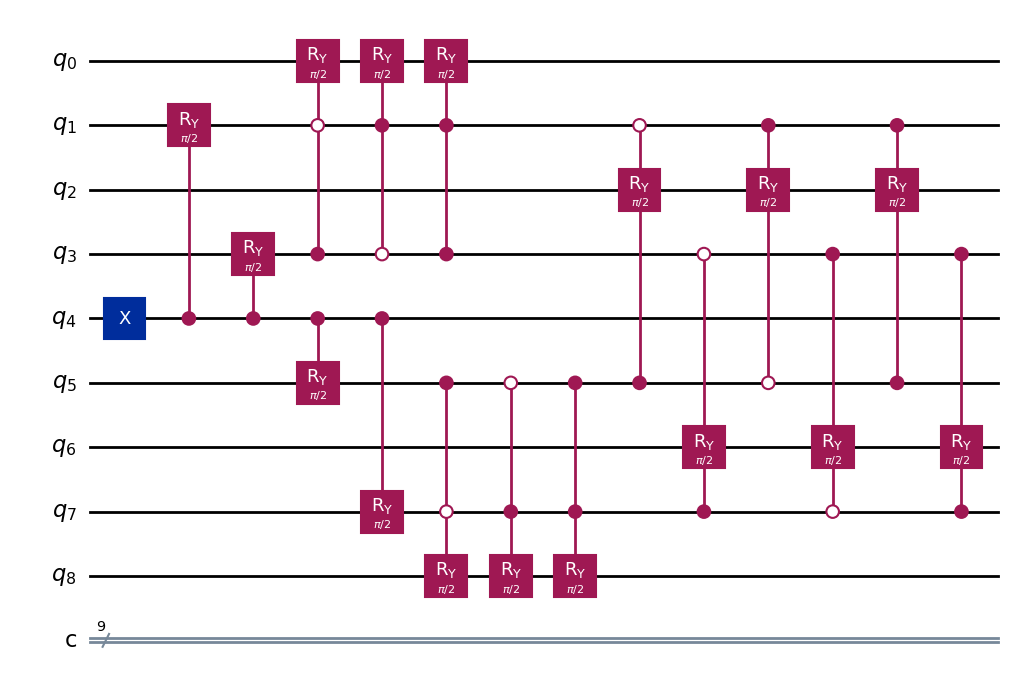

time: 522 ms (started: 2024-04-12 08:00:49 +00:00)


In [32]:
solution = np.full(
  shape=16,
  fill_value=np.pi/2,
  dtype=np.float64
)
qc = create_circuit(solution, 4)
qc.draw("mpl")

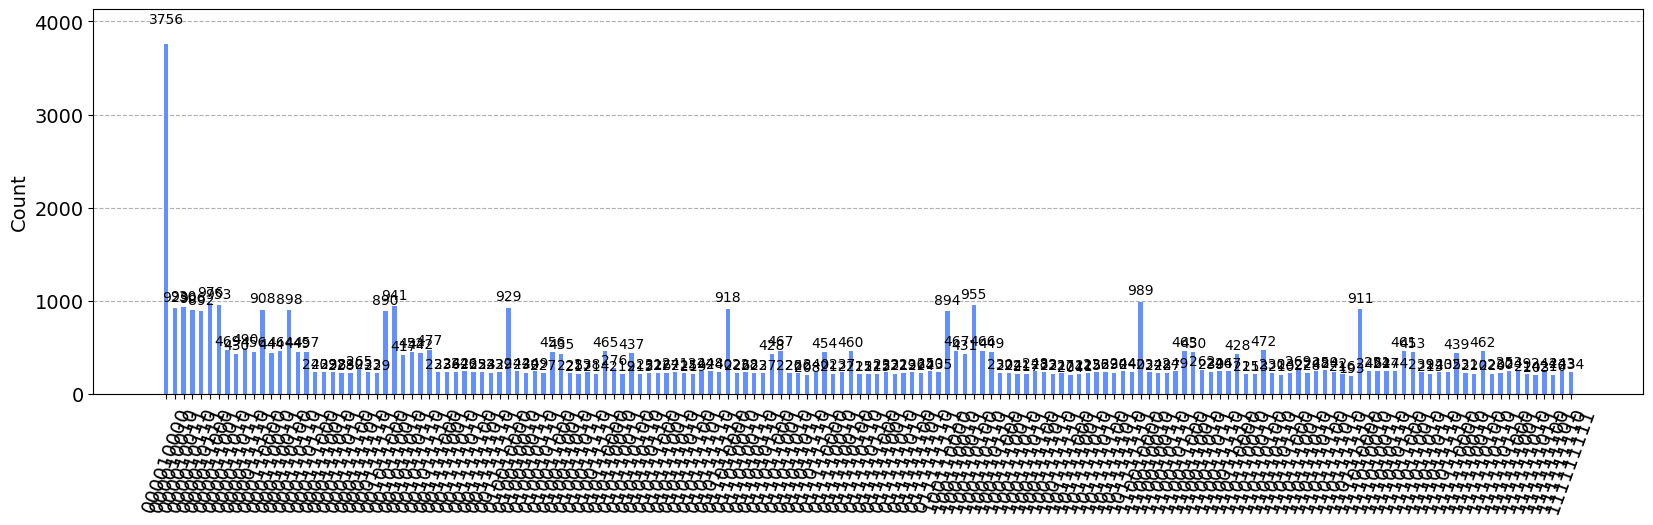

time: 1.79 s (started: 2024-04-12 08:00:50 +00:00)


In [33]:
counts = evaluate(qc)
plot_histogram(counts, figsize=(20,5))

In [34]:
values = [val for val in counts.values()]
np.std(values)

341.7287347344445

time: 5.44 ms (started: 2024-04-12 08:00:52 +00:00)


In [35]:
"""
Circuit creation
"""
def create_circuit(solution, start):
  gate_index = 0

  qc = QuantumCircuit(9, 9)
  qc.x(start)

  visited = [start]

  while True:
    frontier = list(set([edge[1] for edge in undirected_edges if edge[0] in visited and edge[1] not in visited]))

    if len(frontier) == 0:
      break

    for node in frontier:
      incoming = [edge[1] for edge in undirected_edges if edge[0] == node and edge[1] in visited]

      if len(incoming) == 1:
        qc.cry(solution[gate_index], incoming[0], node)
        gate_index = gate_index + 1

      if len(incoming) > 1:
        combinations = [''.join([str(a) for a in x]) for x in list(itertools.product([0, 1], repeat=2))][1:]

        for combination in combinations:
          gate = RYGate(solution[gate_index]).control(2, ctrl_state=combination)
          qc.append(gate, [incoming[0], incoming[1], node])
          gate_index = gate_index + 1

    visited.extend(frontier)

  return qc

"""
Evaluate circuit
"""
def evaluate(qc):
  qc.measure(range(9), range(9))
  qasm_sim = Aer.get_backend('qasm_simulator')
  transpiled = transpile(qc, qasm_sim)
  job = qasm_sim.run(transpiled, shots=9**5)
  result = job.result()
  counts = result.get_counts()
  return counts

"""
Fitness Function
"""
def fitness_func(ga_instance, solution, solution_idx):
  qc = create_circuit(solution, 4)
  counts = evaluate(qc)
  values = [val for val in counts.values()]

  fitness_high_priority = len(values)

  return fitness_high_priority + 1 / np.std(values)

time: 2.47 ms (started: 2024-04-12 08:01:07 +00:00)


In [36]:
num_variables = 16

variable_range = np.linspace(0, np.pi, dtype='float')

ga_instance = pygad.GA(num_generations=25,
                       num_parents_mating=4,
                       sol_per_pop=100,
                       num_genes=num_variables,
                       gene_type=np.float64,
                       gene_space=variable_range,
                       on_generation=on_gen,
                       fitness_func=fitness_func)

ga_instance.run()

/usr/local/lib/python3.10/dist-packages/pygad/pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


Generation :  1
Fitness of the best solution : 160.00123124675864
[2.56456543 2.05165235 1.47462512 2.05165235 1.08994031 2.17988062
 1.66696753 1.92342407 0.64114136 1.47462512 1.53873926 2.5004513
 2.56456543 2.37222302 1.02582617 0.57702722]
Generation :  2
Fitness of the best solution : 161.00137896184177
[1.73108167 2.05165235 1.47462512 2.05165235 1.08994031 2.17988062
 1.66696753 1.92342407 0.64114136 1.47462512 1.53873926 2.5004513
 2.56456543 2.37222302 1.02582617 0.57702722]
Generation :  3
Fitness of the best solution : 161.0019924148722
[1.73108167 2.05165235 1.47462512 2.05165235 1.08994031 2.17988062
 1.66696753 1.92342407 1.7951958  1.47462512 1.53873926 2.5004513
 2.56456543 2.37222302 1.02582617 1.02582617]
Generation :  4
Fitness of the best solution : 161.00228437914487
[1.73108167 2.05165235 1.47462512 2.05165235 1.08994031 2.17988062
 1.66696753 1.92342407 1.7951958  1.47462512 1.53873926 1.47462512
 2.56456543 2.37222302 1.02582617 1.02582617]
Generation :  5
Fitn

In [37]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
solution

array([1.7951958 , 1.7951958 , 1.7951958 , 1.85930994, 1.53873926,
       1.41051099, 1.66696753, 1.60285339, 1.66696753, 1.66696753,
       1.53873926, 1.60285339, 1.47462512, 1.66696753, 1.60285339,
       1.60285339])

time: 50.3 s (started: 2024-04-12 09:34:19 +00:00)


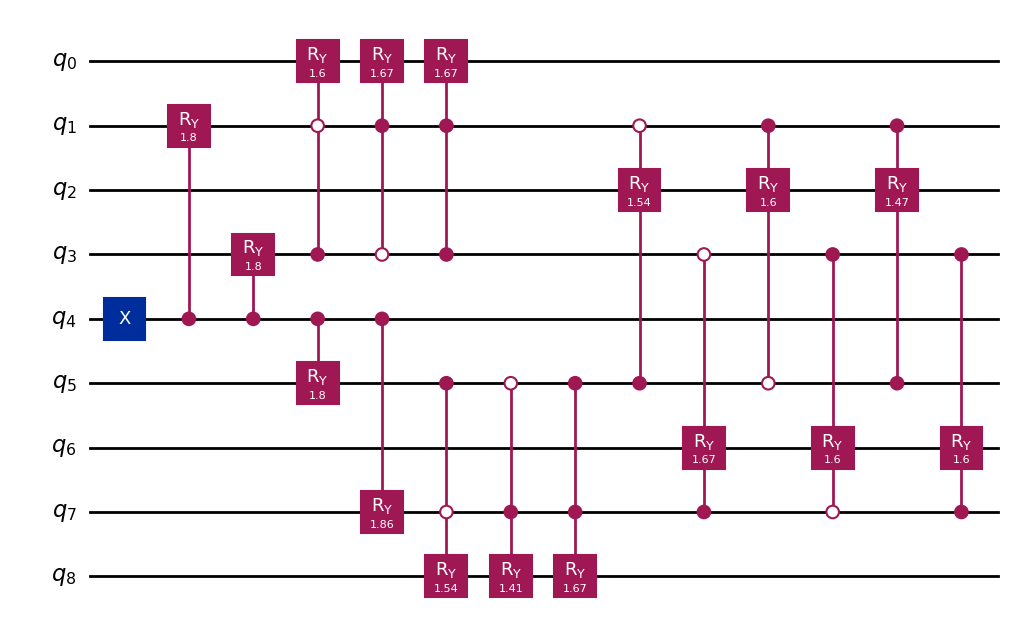

time: 1.64 s (started: 2024-04-12 09:35:30 +00:00)


In [39]:
solution = [1.7951958 , 1.7951958 , 1.7951958 , 1.85930994, 1.53873926,
       1.41051099, 1.66696753, 1.60285339, 1.66696753, 1.66696753,
       1.53873926, 1.60285339, 1.47462512, 1.66696753, 1.60285339,
       1.60285339]
qc = create_circuit_no_meas(solution, 4)
qc.draw("mpl")

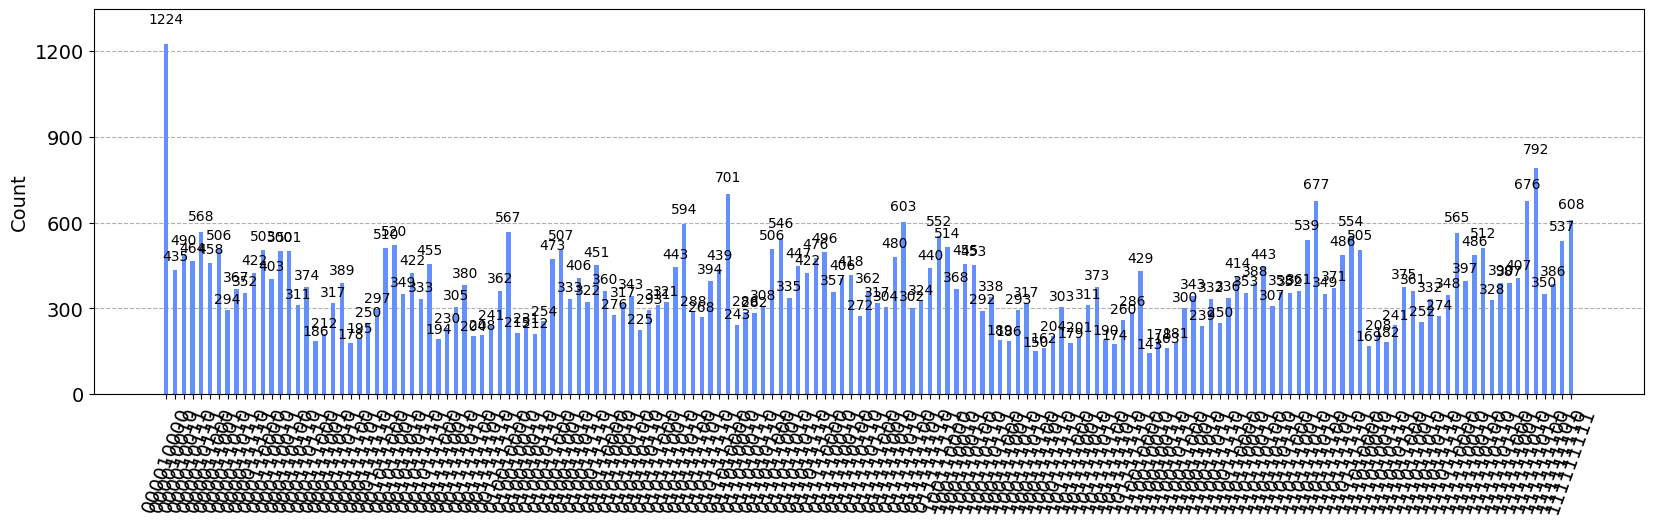

time: 4.82 s (started: 2024-04-12 09:36:05 +00:00)


In [40]:
qc = create_circuit(solution, 4)
counts = evaluate(qc)
plot_histogram(counts, figsize=(20,5))

In [41]:
values = [val for val in counts.values()]
np.std(values)

142.06308263427266

time: 3.55 ms (started: 2024-04-12 09:36:15 +00:00)
